# a bunch of matplotlib recipies 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
sns.set()


### contents:
#### [interactive matplotlib figures](#0)
#### [controlling tick labels](#1)
#### [stacked bar chart](#2)
#### [tick label rotation and tick label font](#3)
#### [line width and marker size](#4)
#### [figure size](#5)
#### [horizontal bar chart](#6)
#### [legend position](#7)
#### [dot size in plt.plot() and plt.scatter()](#8)
#### [transparency](#9)
#### [optional horizontal and vertical lines on the figure](#10)
#### [annotation](#11)
#### [inverse axis](#12)
#### [axes limits](#13)
#### [legend fontsize](#14)
#### [seaborn heatmap](#15)
#### [using various colormaps for seaborn heatmap](#16)
#### [discrete color code for heatmap](#17)
#### [saving the figure instead of showing it](#18)
#### [interactive matplotlib figures](#19)
#### [bar chart : bars side by side](#20)









### <a id="0">interactive matplotlib figures</a>

**if %matplotlib notebook shows blank figure, restrart the kernel. This problem occurs, look for the solution here:** https://stackoverflow.com/questions/41125690/matplotlib-notebook-showing-a-blank-histogram


<IPython.core.display.Javascript object>


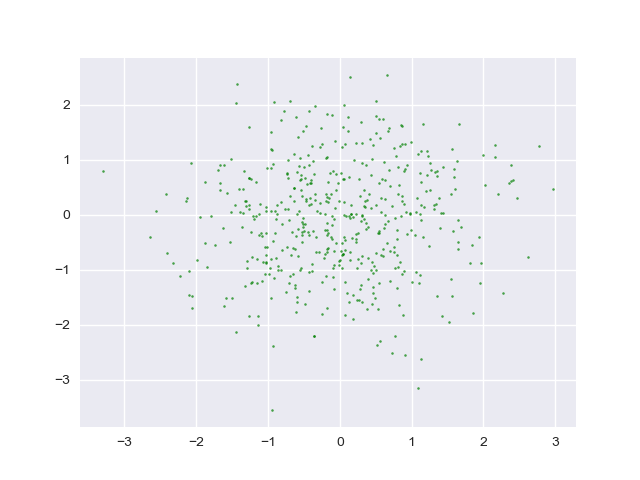

In [9]:
%matplotlib notebook

x = np.random.randn(500)        
y = np.random.randn(500)
plt.scatter(x, y, alpha=0.7, color="green", s=2)
plt.show()

### <a id="1">controlling tick labels</a>

**ticks by default are :**

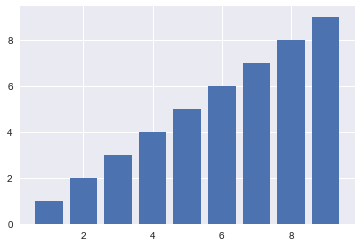

In [3]:
%matplotlib inline
fig = plt.figure()
plt.bar(list(range(1,10)),list(range(1,10)))
plt.show()

**using plt.xticks and plt.yticks methods we set the actual values of x-axis:**

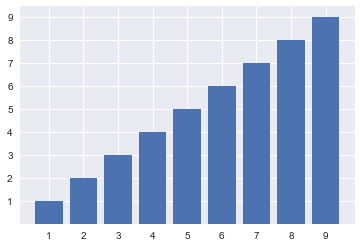

In [3]:
fig0 = plt.figure()
plt.bar(list(range(1,10)),list(range(1,10)))
plt.xticks(list(range(1,10))) # <<< 
plt.yticks(list(range(1,10))) # <<<
plt.show()

**by passing the second arg with create marks themselves above the values (like this: plt.xticks([values], [marks]))**

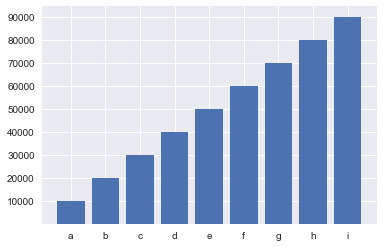

In [4]:
fig0 = plt.figure()
plt.bar(list(range(1,10)),list(range(1, 10)))
plt.xticks(list(range(1,10)), ["a", "b", "c", "d", "e", "f" , "g", "h", "i", "j"]) # <<<
plt.yticks(list(range(1,10)), list(range(10000, 100000, 10000))) 
plt.show()



### <a id="2">stacked bar chart</a>

you need "bottom" parameter 
1. this parameter must be the sum of the previous data (which it "stands on")
2. perhaps, you'll have to create numpy array to sum the data up

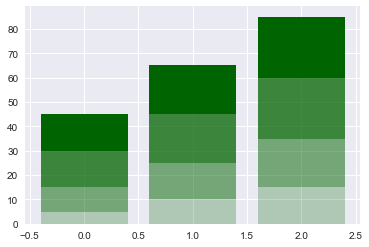

In [5]:
stack_bar = plt.figure()
b = [5,10,15]
b1 = [10, 15, 20]
b2 = [15, 20, 25]
b3 = [20, 25, 30]

plt.bar(list(range(len(b))), b, color="darkgreen", alpha=0.25)
plt.bar(list(range(len(b1))), b1, color="darkgreen", alpha=0.5, bottom=b) # <<<<<<
plt.bar(list(range(len(b2))), b2, color="darkgreen", alpha=0.75, bottom=np.array(b) + np.array(b1))  # <<<<<<
plt.bar(list(range(len(b2))), b2, color="darkgreen", alpha=1.0, bottom=np.array(b) + np.array(b1) + np.array(b2))  # <<<<<<

plt.show()

### <a id="3">tick label rotation and label font</a>

by the "set_xticks" and "set_xticklabels" methods of the axes obj

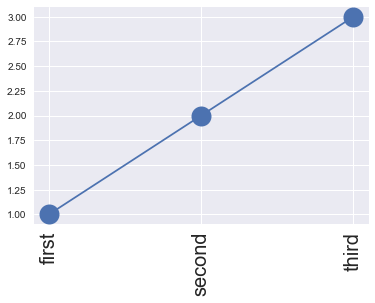

In [6]:
fig1 = plt.figure()
ax = plt.axes()  # <<<< ax obj
 
labels = ["first", "second", "third"] # <<< labels are stored in here

plt.plot(range(1,4), range(1,4), marker="o", ms="20")

ax.set_xticks([1,2,3]) # <<<<< setting numbers of ticks
ax.set_xticklabels(labels, rotation="vertical", fontsize="20") # <<<< setting labels, rotation and font

plt.show()

** and a bit easier way: 'plt' interface with custom rotation : **

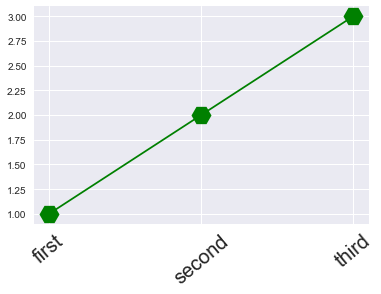

In [7]:
fig2 = plt.figure()
labels = ["first", "second", "third"] # <<< labels are stored in here
plt.plot(range(1,4), range(1,4), marker="H", ms="20", c="green")
plt.xticks([1,2,3], labels, rotation=40, fontsize=20) # <<<<< setting numbers of ticks and labels themselves. arrays must be of the same size
plt.show()



### <a id="4">line width and marker size</a>
1. linewidith parameter in plt.plot()
2. ms is marker size parameter in plt.plot()

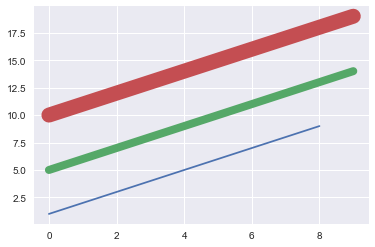

In [8]:
fig2 = plt.figure()

data = np.arange(1,10)
data1 = np.arange(5, 15)
data2 = np.arange(10, 20)

plt.plot(list(range(len(data))), data)
plt.plot(list(range(len(data1))), data1, linewidth=8) # <<<<< 
plt.plot(list(range(len(data2))), data2, linewidth=15) # <<<<<

plt.show()



### <a id="5">figure size</a>
add "figsize" parameter to "myfig = plt.figure() call"

"figsize" is a tuple of width and height

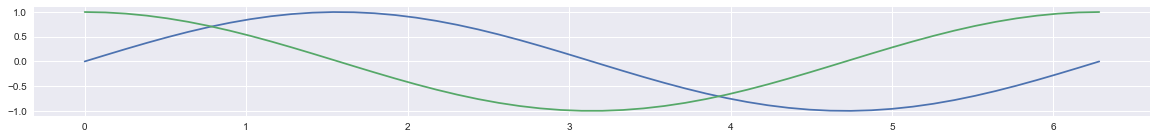

In [9]:
fig = plt.figure(figsize=(20, 2))

x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
y1 = np.cos(x)

plt.plot(x, y)
plt.plot(x, y1)

plt.show()

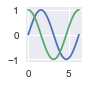

In [10]:
fig = plt.figure(figsize=(1, 1))

x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
y1 = np.cos(x)

plt.plot(x, y)
plt.plot(x, y1)

plt.show()

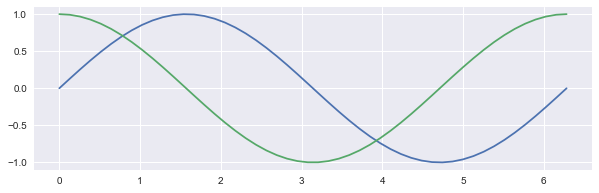

In [11]:
fig = plt.figure(figsize=(10, 3))

x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
y1 = np.cos(x)

plt.plot(x, y)
plt.plot(x, y1)

plt.show()


### <a id="6">horizontal bar chart</a>
1. use plt.barh() method
2. to plot sterr use xerr, not yerr


In [12]:
bacteria = [('genus_Faecalibacterium', 6.375431983590924, 3.719869522993805),
 ('genus_Roseburia', 3.955121417108843, 2.483783717487731),
 ('genus_Bacteroides', 2.8371313398244538, 2.453194218608125)]

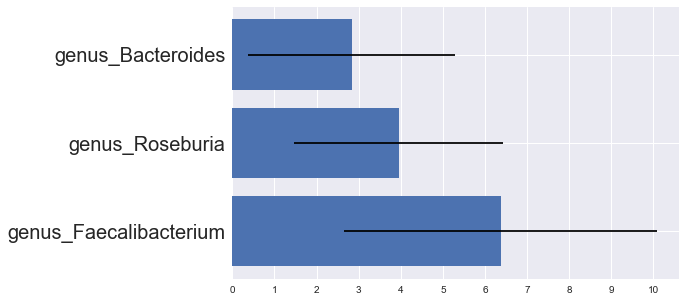

In [13]:
fig_leg = plt.figure(figsize=(8,5))
# preparing some data
datum = [x[1] for x in bacteria]
dev = [x[2] for x in bacteria]
names = [x[0] for x in bacteria]

plt.barh(range(len(datum)), datum, xerr=dev)# <<<<<<<
plt.yticks(range(len(names)), names, fontsize="20")

plt.xticks(range(0,11))
plt.show()



### <a id="7">legend position</a>
1. add "label='name_of_label'" parameter to your plt.plot() call
2. add "bbox_to_anchor" parameter to plt.legend() call
3. "bbox_to_anchor" takes two args in a tuple: lower left corner at position (x,y)

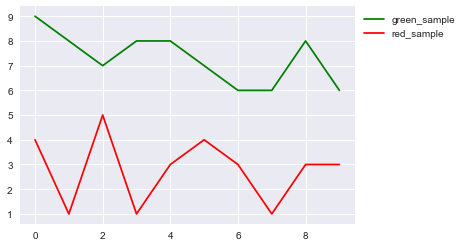

In [14]:
fig_leg = plt.figure()
plt.plot(np.random.randint(6,10, size=10), label="green_sample", c="green")
plt.plot(np.random.randint(1,7, size=10), label="red_sample", c="red")
plt.legend(bbox_to_anchor=(1.0, 1.0)) # <<<<
plt.show()

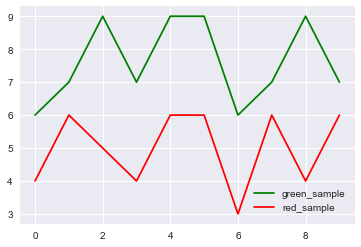

In [15]:
fig_leg = plt.figure()
plt.plot(np.random.randint(6,10, size=10), label="green_sample", c="green")
plt.plot(np.random.randint(1,7, size=10), label="red_sample", c="red")
plt.legend(bbox_to_anchor=(1.0, 0.2)) # <<<<
plt.show()



### <a id="8">dot size in plt.plot() and plt.scatter()</a>
1. ms parameter in plt.plot() call
2. s parameter for plt.scatter() 


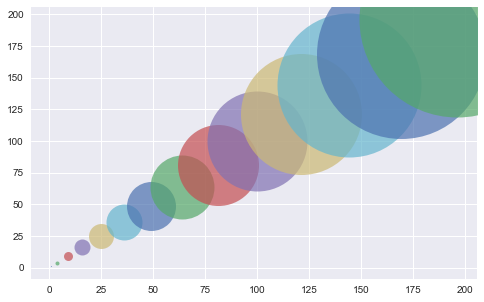

In [16]:
fig_mark = plt.figure(figsize=(8,5))

nums = [x**2 for x in range(1,15)]
dotsize = [x**2 for x in range(1,15)]

counter = 0
for n in nums:
    plt.plot(n, n, marker="o", ms=dotsize[counter], alpha=0.7)
    counter += 1

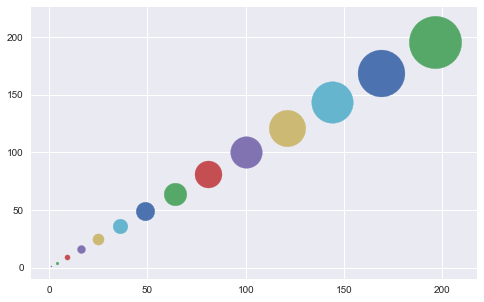

In [17]:
fig_mark_scat = plt.figure(figsize=(8,5))

nums = [x**2 for x in range(1,15)]
dotsize = [x**3 for x in range(1,15)]

counter = 0
for n in nums:
    plt.scatter(n, n, marker="o", s=dotsize[counter])
    counter += 1




### <a id="9">transparency</a>
- alpha parameter in plt.scatter()



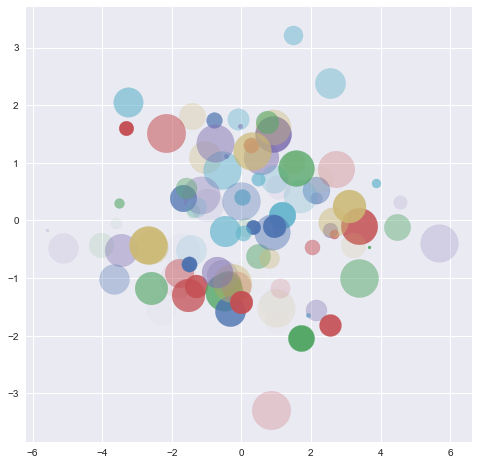

In [18]:
fig_trans = plt.figure(figsize=(8,8))
x = np.random.randn(100)        # 100 random nums of normal distribution with mean 0 and variance 1 
y = np.random.randn(100) * 2    # 100 random nums of normal distribution with mean 0 and variance 1 multiplied by 2
dot_sizes = np.random.choice(1500, size=100) # 100 random numbers [0, 1499]

transparency = np.random.random(100)   # 100 random numbers in the half open interval [0,1), various transparency degrees

for i in range(100):
    plt.scatter(y[i], x[i], s=dot_sizes[i], alpha=transparency[i])

plt.show()



### <a id="10">optional horizontal and vertical lines on the figure</a>
1. plt.axhline() and plt.axvline() methods
2. main parameter is x or y coordinate according to the method used


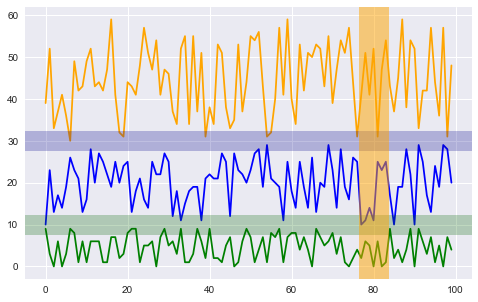

In [19]:
fig_hoz_vert = plt.figure(figsize=(8, 5))

plt.plot(np.random.randint(0,10, size=100),  c="green") # random nums from 0 to 10, 100 numbers
plt.plot(np.random.randint(10,30, size=100),  c="blue")
plt.plot(np.random.randint(30,60, size=100),  c="orange")

plt.axhline(30, lw=20, alpha=0.25, color="darkblue") 
plt.axhline(10, lw=20, alpha=0.25, color="darkgreen")
plt.axvline(80, lw=30, alpha=0.5, color="orange")

plt.show()


### <a id="11">annotation</a>



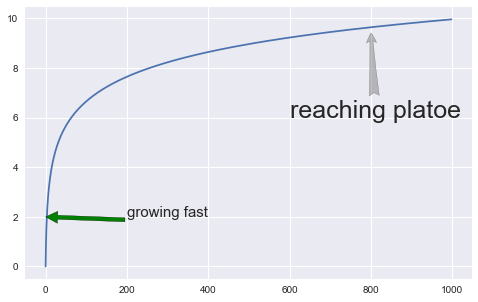

In [20]:
fig_ann = plt.figure(figsize=(8,5))

x = np.log2([x for x in range(1,1000)])

plt.plot(range(0,len(x)), x)

plt.annotate("growing fast", xy=(0, 2), size=15, xytext=(200, 2),
             arrowprops=dict(facecolor="green"))
plt.annotate("reaching platoe", xy=(800, 9.5), size=25, xytext=(600, 6),
             arrowprops=dict(facecolor="grey", arrowstyle="fancy", alpha=0.5))

plt.show()


### <a id="12">inverse axis</a>

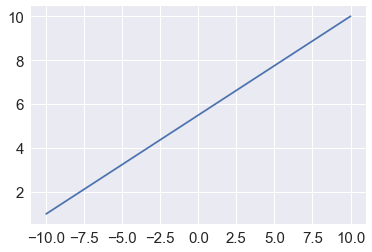

In [29]:
x = np.linspace(-10, 10, 10)
y = np.linspace(1, 10, 10)

fig_inverse = plt.figure()
plt.plot(x, y)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

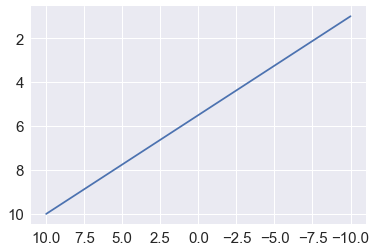

In [30]:

x = np.linspace(-10, 10, 10)
y = np.linspace(1, 10, 10)

fig_inverse = plt.figure()
plt.plot(x, y)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.gca().invert_xaxis()  # <---- these lines do the job
plt.gca().invert_yaxis()  # <---- and for y axis
plt.show()



### <a id="13">axes limits</a>
1. use xlim and ylim methods
2. xlim(axis start, axis end) and ylim(axis start, axis end)

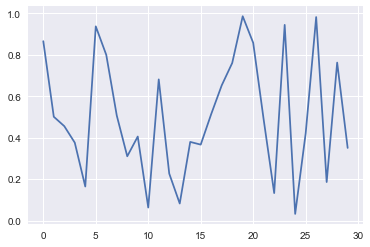

In [23]:
fig_lim = plt.figure()
data = np.random.random(30)
plt.plot(data)
plt.show()

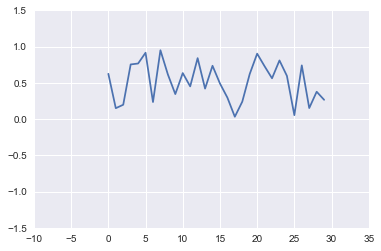

In [24]:
fig_lim = plt.figure()
data = np.random.random(30)
plt.plot(data)

plt.ylim(-1.5, 1.5)# <<<
plt.xlim(-10, 35)# <<<

plt.show()

### <a id="14">legend fontsize</a>

plt.legend() has "prop" function
which takes dict of parameters 



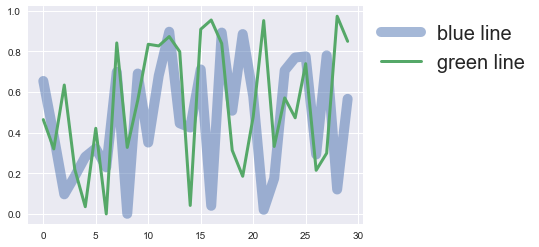

In [31]:
fig_leg = plt.figure()
data1 = np.random.random(30)
data2 = np.random.random(30)
plt.plot(data1, label="blue line", linewidth=10, alpha=0.5)
plt.plot(data2, label="green line", linewidth=3)

plt.legend(bbox_to_anchor=(1.0, 1.0), prop={"size" : 20})# <<<<
plt.show()



### <a id="15">seaborn heatmap</a>

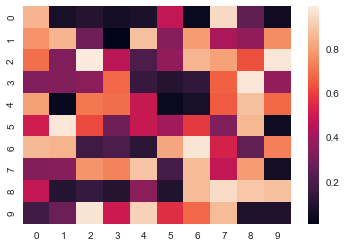

In [4]:
data = [(np.random.random(10)) for x in range(10)]

heat = plt.figure()
sns.heatmap(data)

plt.show()

### <a id="16">using various colormaps for seaborn heatmap</a>

- use colormap name as a 'cmap' parameter

list of matplotlib colormaps :
https://matplotlib.org/users/colormaps.html

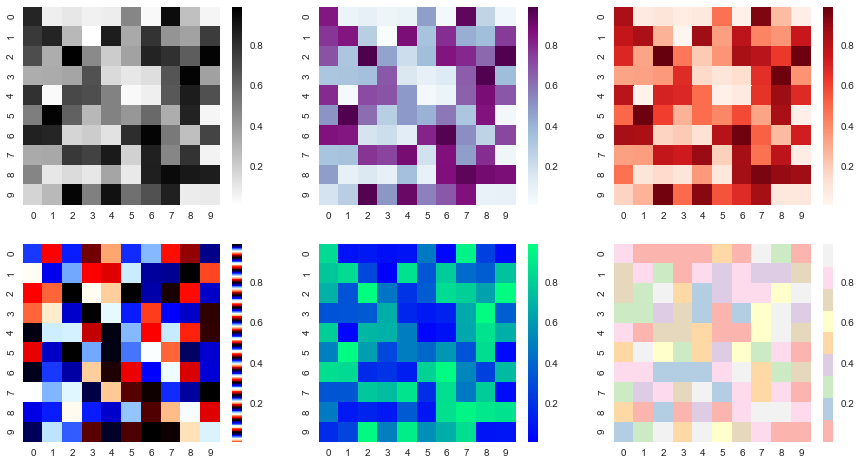

In [30]:
fig = plt.figure(figsize=(15, 8))
plt.subplot(231)
sns.heatmap(data, cmap="binary")
plt.subplot(232)
sns.heatmap(data, cmap="BuPu")
plt.subplot(233)
sns.heatmap(data, cmap="Reds")
plt.subplot(234)
sns.heatmap(data, cmap="flag")
plt.subplot(235)
sns.heatmap(data, cmap="winter")
plt.subplot(236)
sns.heatmap(data, cmap="Pastel1")

plt.show()

### <a id="17">discrete color code for heatmap</a>

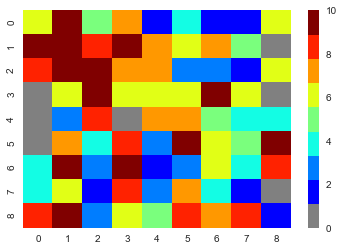

In [14]:
import random

data_heat = []
for i in range(1, 10):
    data_piece = []
    data_heat.append([random.randint(1, 10) for x in range(1, 10)])

# it's used to denote the largest value in colormap and split colormap into segments    
largest_value = max(max(data_heat)) 
cmap = plt.cm.jet # defining colormap
cmaplist = [cmap(i) for i in range(cmap.N)] # list of colors from jet map
cmaplist[0] = (.5, .5, .5, 1.0) # first entry changed to be grey

# creating new map
cmap = cmap.from_list("number of indels", cmaplist, cmap.N)

# creating bounds based on the largest indel number
bounds = np.linspace(0, largest_value, largest_value) 
# generating colormap index (boundaries, num of colors to be used)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N) 

fig = plt.figure()
sns.heatmap(data_heat, cmap=cmap, norm=norm)

plt.show()



### <a id="18">saving the figure instead of showing it</a>

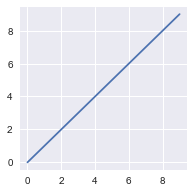

In [2]:
nums = [x for x in range(10)]
fig = plt.figure(figsize=(3,3,))
plt.plot(nums)
plt.show() 

In [3]:
fig = plt.figure(figsize=(3,3,))
plt.plot(nums)
fig.savefig("test.png") #  saving the figure
plt.close() # this method does the job

### <a id="20">bar chart : bars side by side</a>

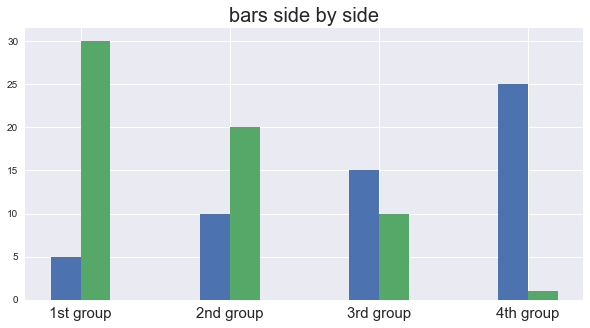

In [58]:
%matplotlib inline

fig = plt.figure(figsize=(10, 5))

data1 = [5, 10, 15, 25]
data2 = [30, 20, 10, 1]

bar_width = 0.2
# position of the bars for data1
index_data1 = [0, 1, 2, 3] 
# position of the bars for data2 : step right on the value of bar_width
index_data2 = [x + bar_width for x in index] 

plt.bar(index_data1, data1, bar_width)
plt.bar(index_data2, data2, bar_width)

# just calculating position of the ticks on the x-axis
# shift position left on the value of bar_width divided by 2
tick_position = [x + bar_width / 2 for x in index] 
plt.xticks(tick_position, ["1st group", "2nd group", "3rd group", "4th group"], fontsize=15)
plt.title("bars side by side", fontsize=20)
plt.show()